## 递归

自己首先写上架构，然后填充。定义好退出条件，定义好表达式。之后再严格按照架构实现代码。递归的代码一般都是足够简单的，所以实现上不容易出错。一旦程序结果有问题，首先不应该是去检查代码，而是应该去检查自己的定义。死循环？初始条件错了、漏了；错误结果？递归式有问题。找出问题了，再依照新的架构改动代码。

1、要相信计算机能自己计算递归，暂时不需要搞清楚是怎么去计算的。

可以将函数内部递归调用自己，假定为一个新的函数，帮助理解。

2、要抽象出递归公式，大问题分解为小问题，小问题一样的求解。

3、要有退出（返回）条件。



In [16]:
# 046-Permutations
# Given a collection of distinct integers, return all possible permutations.

def combine2(ar):
    def helper(result,ar):
        new = ar.pop()
        if len(ar)==0:
            result.append([new])
            return result
        else:
            result=helper(result, ar)
            new=[new]
            result2=[]
            for res in  result:
                for i in range(len(res)+1): #有了前面的一个结果例如【2,3】那么1就分别插入3个空格【空格,2，3】，【2，空格,3】，【2,3，空格】
                    head=res[:i]
                    last=res[i:]
                    new_line=head+new+last
                    result2.append(new_line)
            result=result2
            return result

    result=[]
    result=helper(result, ar)
    return  result
ar=[1,2,3]
print(combine2(ar))


[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]


In [21]:
# 047-Permutation2
# Given a collection of numbers that might contain duplicates,
# return all possible unique permutations.
def combine3(ar):
    result=[]
    array=ar[:]
    visit_set=[]
    def helper(result,array,visit_set):
        new=array.pop()
        if len(array)==0: #这个就是递归的结束条件
            result.append([new])
            visit_set.append(new)
            return result,visit_set
        else:
            result,visit_set=helper(result,array,visit_set)
            
            if new not in visit_set:
                visit_set.append(new)
            else:
                return result,visit_set
            new=[new]
            result2=[]
            for res in result:
                for r in range(len(res)+1):
                    head=res[:r]
                    last=res[r:]
                    new_line=head+new+last
                    result2.append(new_line)
            result=result2       
            return result,visit_set
    result,visit_set=helper(result,array,visit_set)
    return result
ar=[1,2,2,3,2,3]
print(combine3(ar))          


[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]


In [ ]:
# 047-Permutation2
# Given a collection of numbers that might contain duplicates,
# return all possible unique permutations.
def combine4(ar):
    result=[]
    array=ar[:]
    visit_set=[]
    def helper(result,visit,tmp):
        if visit==len(ar):
            result.append(tmp[:])
        tmp=[]
        visit+=1
        
        helper(result,visit,tmp)
   
    return result
ar=[1,2,2,3,2,3]
print(combine3(ar))  

In [19]:
#022-Generate Parentheses
def Parentheses(nums):
    result=[]
    visit_set=[]
    target=nums
    cur=''
    def helper(result,left,right,cur):
        if left>target or right>target or right >left:
            return 
        if left==target and right==target:
            result.append(cur)
            return
        helper(result,left+1,right,cur+'(')
        helper(result,left,right+1,cur+')')
    helper(result,0,0,cur)
    return result
print(Parentheses(ar))  

['((()))', '(()())', '(())()', '()(())', '()()()']


In [23]:
'gg'.count('g')

2

In [24]:
['2'*2]



['22']

In [29]:
class Solution(object):
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        can = []
        res = []
        visited = set()
        self.helper(res, can, visited, nums)
        return res

    def helper(self, res, can, visited, nums):
        if len(can) == len(nums):
            res.append(can[:])
            return
        for i, n in enumerate(nums):
            if n not in visited:
                visited.add(n)
                can.append(n)
                self.helper(res, can, visited, nums)
                can.pop()
                visited.remove(n)
nums=[1,2,3]
sol=Solution()
sol.permute(nums)


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

#https://zhuanlan.zhihu.com/p/47978013  
(3). 模板参数说明：in是数字集合；out是给定数的一个全排列；dict: in取了数之后其余的数组成的集合，暂时称为剩余集合；start是0~in.size()；i是取剩余集合的数(即in没取的数)，实现了对dict的遍历。注意start需要回到in原始位置再求下一个解，所以有出栈操作；每次in取数后集合都会发生变化，所以要有used标记。

In [16]:
#template T U V W
#1. 最终结果保存，所有解的集合
#vector<vector<U>> res;
#2. 访问标记(可选)
#3. 字典(可选)，这个字典是in元素变换到out元素集合的映射dict
#4. 遍历优化(可选)，二维遍历时的方向优化
#5. 递归函数实现
#其中in是输入，out是最终输出结果集合的每一个结果(在终止条件前是结果的部分)
#start是in中当前读入的序列位置
used=[]
def fooDFS( in_put, start, used,tmp,out_put):
    #5.1 终止条件，一般情况是start遍历到尾了
    if start== len(in_put) :
        out_put.append(tmp[:])
        return 
    #5.2 主循环
    for i in range(len(in_put)): #i遍历的是in序列的每个元素所变换到out元素集合
        if in_put[i] not in used:
            used.append(in_put[i])  #5.2.1 访问标记置位(可选)，一般当每次处理in序列中一个元素(如只能取一次)需要标记	 
            print(used)  #5.2.2 额外判定条件(可选),这个题目没有
            tmp.append(in_put[i])#5.2.3 压栈，或字符串的尾部追加(也是一种压栈)
            fooDFS(in_put, start+1,used,tmp, out_put) #5.2.4 进入递归函数 
            tmp.pop()#5.2.5 出栈(可选)，一般当start对输入in序列要来回遍历时，找到一个解out之后，
    #需要出栈，否则会出现解叠加情况，变成[解1],[解1,解2],[解1,解2,解3]……
            used.pop() #5.2.6 访问标记位置重置(可选)
   

#6.主函数
def foo(in_put):
    #6.1 结果初始化
    res=[]
    used=[]
    tmp=[]
    #6.2 边界检查
    if(len(in_put)==0):
        return
    #6.3 每一个解，临时存储

    #6.4 调用递归函数入口
    fooDFS(in_put, 0,used,tmp, res);
    #6.5 返回结果
    return res;
#7. 辅助判断函数(可选)
in_put=[1,2,3]
print(foo(in_put))      

[1]
[1, 2]
[1, 2, 3]
[1, 3]
[1, 3, 2]
[2]
[2, 1]
[2, 1, 3]
[2, 3]
[2, 3, 1]
[3]
[3, 1]
[3, 1, 2]
[3, 2]
[3, 2, 1]
[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


In [ ]:
#77. Permutations II
def Permutations_2(nums,target):
    result=[]
    tmp=[]
    def helper(tmp,result,remain,start):
        if remain==0:
            result.append(tmp[:])
            return 
        if remain<0:
            return 
        #print(remain)
        for i in nums:
            print(i)
            tmp.append(i)
            helper(tmp,result,remain-i,start+1)
            tmp.pop()
    helper(tmp,result,target,0)
    print(result)
nums=[2,3,6,7]
target = 7
com_sum(nums,target)

In [46]:
#017-Letter Combinations of Phone Number
def phone(nums):
    dic = {
    '2': ['a', 'b', 'c'],
    '3': ['d', 'e', 'f'],
    '4': ['g','h','i'],
    '5': ['j','k','l'],
    '6': ['m','n','o'],
    '7': ['p','q','r','s'],
    '8': ['t','u','v'],
    '9': ['w','x','y','z']
    }
    
    result=[]
    def helper(tmp,result,start):
        if start==len(nums):
            result.append(tmp[:])
            return 
        start+=1
        for i in dic[nums[start-1]]:#结合了start，以及in对应的字典映射
            tmp+=i #入栈
            helper(tmp,result,start)
            tmp=tmp[:-1] #出站
    helper('',result,0)
    print(result)
nums='23'    
phone(nums)      
        
    
    

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


## 039-Combination Sum
这个地方的为啥需要对每个start层的 candidate缩减解的空间。  
所以
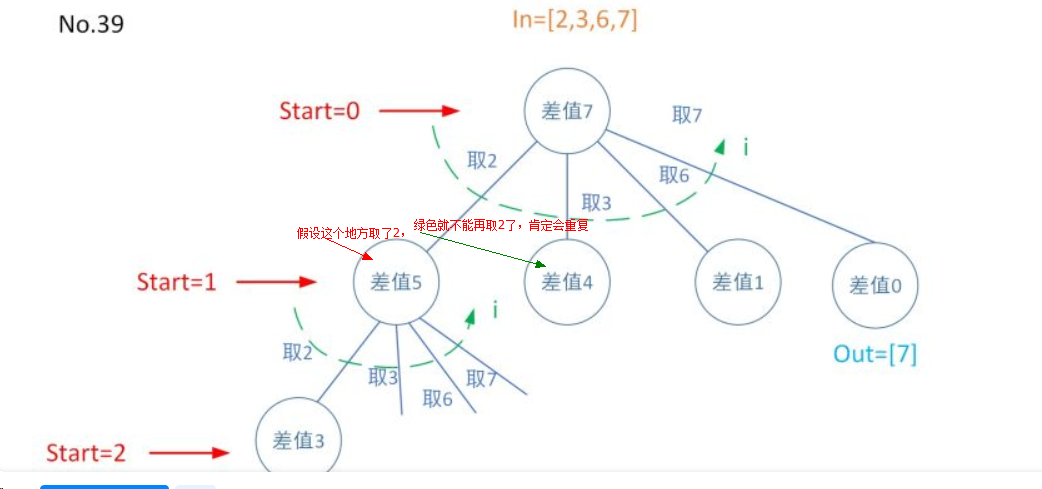


迭代的循环图前15步，看看蓝色的字体部分，要达到这种效果，就是要把上一层的循环的i，作为下一层i的开始。那么为啥不用一个数组used给记录下呢，因为上一层used用了【例如下图中的2， 3都将不能使用，因为2已经在第0层使用了】，下一层就真的是完全不能重复了（用这题的这种方式排除了2,但是3还是照样使用，）。  
**总结下2中去重的方式：**  
1.如果必须完成不一样就用used，把这个used 一层层往下传，并且要记得现在做的是递归回溯，有append 就有 pop  
2.如果只是不想费力去跑重复的解空间，那么就用这个方式上一层从i传到下一层当做下一层循环的开始。


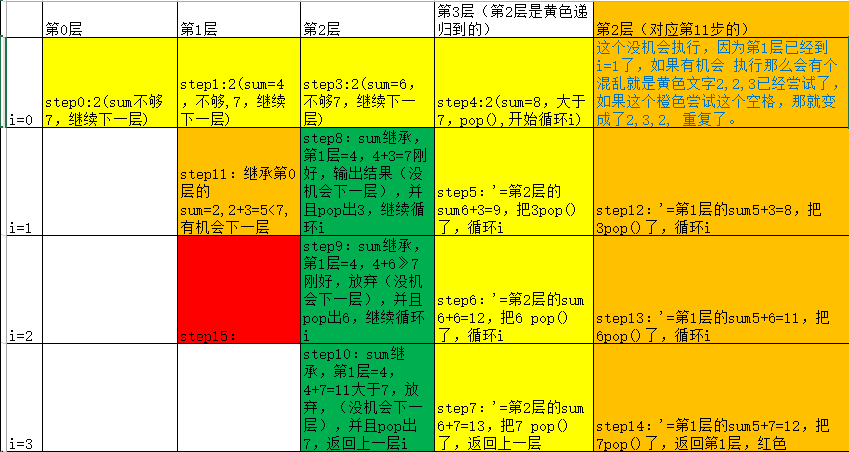

In [10]:

def com_sum(nums,target):
    result=[]
    tmp=[]
    def helper(tmp,result,remain,start):
        
        if remain==0:
            result.append(tmp[:])
            return 
        if remain<0:
            return 
        #print(remain)
        for i in range(start,len(nums)):
            print(nums[i])
            tmp.append(nums[i])
            helper(tmp,result,remain-nums[i],i)
            tmp.pop()
    helper(tmp,result,target,0)
    print(result)
nums=[2,3,6,7]
target = 7
com_sum(nums,target)

2
2
2
2
3
6
7
3
6
7
3
3
6
7
6
7
3
3
3
6
7
6
7
6
6
7
7
[[2, 2, 3], [7]]


In [38]:
## 93. Restore IP Addresses
def ip_add(ips):
    result = []
    tmp = []

    def helper(result, tmp, tmp_sum, start):

        if tmp != [] and int(tmp[-1]) > 255:
            return

        if len(tmp) > 4:
            return
        if len(tmp) == 4 and len(''.join(tmp)) == len(ips):
            result.append('.'.join(tmp))
            return
        elif len(tmp) == 4 and ''.join(tmp) != len(ips):
            return
        if (len(ips)-len(''.join(tmp)))>(4-len(tmp))*3: #已经拍了2部分，剩余还大于3*2=6个数字没排，也就不用排了，肯定没救了
            return
        for i in [1, 2, 3]:
            print(start,i)
            if (tmp_sum + i)>len(ips): # 这个主要是防止最后整个ip只有10位，在第4部分，i=2已经达到了10位了，在i=3就没意义（也只能取到10位），而且重复。
                return
            tmp.append(ips[tmp_sum:tmp_sum + i])
            print(tmp)
            tmp_sum += i
            helper(result, tmp, tmp_sum, start + 1)
            a = tmp.pop()
            tmp_sum -= len(a)
            print(tmp_sum)

    helper(result, tmp, 0, 0)
    print(result)
    return result


ips = "25525511135"
ip_add(ips)

0 1
['2']
0
0 2
['25']
1 1
['25', '5']
2
1 2
['25', '52']
2
1 3
['25', '525']
2
0
0 3
['255']
1 1
['255', '2']
3
1 2
['255', '25']
2 1
['255', '25', '5']
5
2 2
['255', '25', '51']
5
2 3
['255', '25', '511']
5
3
1 3
['255', '255']
2 1
['255', '255', '1']
6
2 2
['255', '255', '11']
3 1
['255', '255', '11', '1']
8
3 2
['255', '255', '11', '13']
8
3 3
['255', '255', '11', '135']
8
6
2 3
['255', '255', '111']
3 1
['255', '255', '111', '3']
9
3 2
['255', '255', '111', '35']
9
3 3
6
3
0
['255.255.11.135', '255.255.111.35']


['255.255.11.135', '255.255.111.35']

In [ ]:
## 131. Palindrome Partitioning
def ip_add(ips):
    sorted(ips)
    result = []
    tmp = []

    def helper(result, tmp, tmp_sum, start):
        if len(tmp) == 3:
            result.append(tmp[:])
            return
      
        for i in [1, 2, 3]:
            print(start,i)
            if (tmp_sum + i)>len(ips): # 这个主要是防止最后整个ip只有10位，在第4部分，i=2已经达到了10位了，在i=3就没意义（也只能取到10位），而且重复。
                return
            tmp.append(ips[tmp_sum:tmp_sum + i])
            print(tmp)
            tmp_sum += i
            helper(result, tmp, tmp_sum, start + 1)
            a = tmp.pop()
            tmp_sum -= len(a)
            print(tmp_sum)

    helper(result, tmp, 0, 0)
    print(result)
    return result


ips = [1,1,2]
ip_add(ips)

In [40]:
## 131. Palindrome Partitioning
def ip_add(ips):
    sorted(ips)
    result = []
    tmp = []

    def helper(result, tmp, tmp_sum, start):
        if len(tmp) == 3:
            result.append(tmp[:])
            return
      
        for i in [1, 2, 3]:
            print(start,i)
            if (tmp_sum + i)>len(ips): # 这个主要是防止最后整个ip只有10位，在第4部分，i=2已经达到了10位了，在i=3就没意义（也只能取到10位），而且重复。
                return
            tmp.append(ips[tmp_sum:tmp_sum + i])
            print(tmp)
            tmp_sum += i
            helper(result, tmp, tmp_sum, start + 1)
            a = tmp.pop()
            tmp_sum -= len(a)
            print(tmp_sum)

    helper(result, tmp, 0, 0)
    print(result)
    return result


ips = [1,1,2]
ip_add(ips)

[1, 2, 3]

# 动态规划

[动态规划入门](https://mp.weixin.qq.com/s/3h9iqU4rdH3EIy5m6AzXsg)

最近刷了很多动态规划的问题，归纳一下做动态规划的题的方法。

动态规划很多题目是解决**最长最多最少最大最小**的问题。

动态规划问题的基本做法是：

    确定递推量
    推出递推式
    确定边界

在解决上述问题的同时，要时刻注意如何把全局的问题变成局部的（最优子结构），如何把前面计算过的子问题利用起来（重叠子问题）。

下面把动态规划题分为几种类型[总结](https://blog.csdn.net/king_like_coding/article/details/52904122 )。

算种数的动态规划

典型的题目包括：

62.Unique Paths

63.Unique Paths II

70.Climbing Stairs

91.Decode Ways

95.Unique Binary Search Trees II

这类型的题目主要是算种数，依靠前面算出的种数算后面的种数。第70题Climbing Stairs和91题Decode Ways是利用了斐波那契数列，两道题目非常相似。第95题Unique Binary Search Trees II是卡特兰数的应用。第62题Unique Paths和63题Unique Paths II是两道二维的算种数的问题。

二维动态规划

典型的题目包括：

62.Unique Paths

63.Unique Paths II

64.Minimum Path Sum

72.Edit Distance

97.Interleaving String

这五道题是二维的动态规划，二维动态规划相当于填一张二维的表。经常的做法先填完第一行和第一列，然后其他的几行用一个两次循环，每一个空格通过相邻的左边[i][j-1]，上边[i-1][j]或着对角[i-1][j-1]来填完所有项。

局部动态规划

典型的题目包括：

53.Maximum Subarray

152.Maximum Product Subarray

300.Longest Increasing Subsequence

368.Largest Divisible Subset

这类型题目的特点是它最后一个的递推量并不是相应的最优解，而是所有递推量的最大值才是最优解。（当然你也可以设置两个递推量，一个全局的，一个局部的，而这里考虑的递推量是局部的），递推量的特点是一定包括自己，所以是局部的。

全局动态规划

典型的题目包括：

32.Longest Valid Parentheses

198.House Robber

213.House Robber II

这是最普通的动态规划，相对于局部动态规划递推量就是最优解。
递归和动态规划

典型的题目包括：

403.Frog Jump

主要是利用“备忘录”的方法，在递归的基础上将子问题的解记录。普通的动态规划从下往上，递归的动态规划从上往下再从下往上，要注意递推量的确定，递推量必须是唯一。



## [背包问题](https://www.jianshu.com/p/ded1a29670c9)

可以做为2维问题的baseline 和 国王金矿的例子一样https://mp.weixin.qq.com/s/3h9iqU4rdH3EIy5m6AzXsg

从经典的0-1背包问题开始
一个背包, 容量为C. 现在有n中不同的物品, 编号为 0, 1, 2, ..., n - 1, 其中每一件物品的重量为w(i), 价格为 v(i). 问可以想这个背包中方那些物品, 是的在不超过背包容量的基础上, 总物品的价格最大.

对于i个物体, 最大价值有两种可能: 
第一种是放弃第i个, 只去前面i - 1个物体的最大值.
第二种是选择放进第i个, 然后加上前面 i - 1 个物体的最大值. 由于放进了第i个物品, 那么背包的容量就要减少w(i), 剩下 c - w(i) 的容量
因此递推方程如下:

F(i, c) = max(F(i - 1, c), v(i) + F(i - 1, c - w(i)))

整个解的过程可以看成类似这样的表格（行是石头，列是袋子空间）

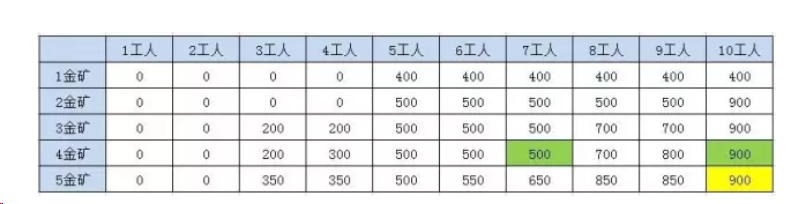

这种二维表格，只需要存储前一行的结果，就可以导出新一行。



In [12]:
def maxValue(weights, values, capacity):
    n = len(values)
    print(n)
    dp = [[0 for j in range(capacity + 1)] for i in range(n)]
    #列从1开始假设，假设到实际cap
    #行从1个物品，一直到可以有N个物品，

    for j in range(1, capacity + 1):
        if j >= weights[0]:
            dp[0][j] = values[0]  #一个物品，就随便选一个了，后面都会优化成正确的

    for i in range(1, n): #按行来，当行 7用上一行的结果即可
        for j in range(1, capacity + 1):  #F(i, c) = max(F(i - 1, c), v(i) + F(i - 1, c - w(i)))
            a = dp[i - 1][j] #a表示上一行的结果，并且是i-1单元格的。
            b = 0
            if j - weights[i] > 0: #当前的袋子减去i的空间还是大于0，否则就装不进去b只能=0
                b = values[i] + dp[i - 1][j - weights[i]]
            dp[i][j] = max(a, b)

    return dp[n - 1][capacity] #最后一行，最后一列的值作为最后答案

def test():
    weights = [ 4,5, 7, 2, 6]
    values = [ 3,12, 10, 3, 6]
    capacity = 15
    # output 25
    print(maxValue(weights, values, capacity))
test()

5
[[0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
25


In [ ]:
# 322-Coin Change
# You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.
#F(amount) = min(F(amount - c) + 1, ... )
#https://blog.csdn.net/qq_23997101/article/details/74009845
class Solution(object):

    def coinChange(self, coins, amount):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        if amount == 0:
            return 0
        inf = (1 << 32) - 1
        dp = [inf for i in range(amount + 1)] #要求最小值，就把所有搞到最大值
        dp[0] = 0
        
        for i in range(1, amount + 1):
            for c in coins:
                if i - c >= 0:
                    dp[i] = min(dp[i], dp[i - c] + 1)
        
        return dp[amount] if dp[amount] < inf else -1


In [ ]:
# House Robber(198)
#当我选定要偷第n栋house的时候，那么我们算上之前偷的，
# 最大值就是nums[n]+max(have_stolen[n-2],have_stolen[n-3])。
# 如果-1，就会报警；如果-4，那么have_stolen[n-2]一定大于等于have_stolen[n-4]的值。

def rob(self, nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    rob = [0,0,0] #这个主要目的是为了最后一行的[-1],[-2]
    for pre_house,money in enumerate(nums): 
        rob.append(money+max(rob[pre_house],rob[pre_house+1]))
    return max(rob[-1],rob[-2])

In [4]:
#House Robber(213)
# 只需要通过两次遍历就可以得到结果，一次是删去最后一家，
# 一次是删去第一家。经过调整后的代码如下：

def rob(self, nums):
    """
    :type nums: List[int]
    :rtype: int
    """
    if len(nums) == 0 : return 0
    if len(nums) == 1 : return nums[0]
    rob1 = [0,0,0]
    result = 0
    for pre_house,money in enumerate(nums[:-1]): 
        rob1.append(money+max(rob1[pre_house],rob1[pre_house+1]))
    rob2 = [0,0,0]
    for pre_house,money in enumerate(nums[1:]): 
        rob2.append(money+max(rob2[pre_house],rob2[pre_house+1]))
    return max(rob1[-1],rob1[-2],rob2[-1],rob2[-2])

[1]

In [2]:
def bubble(ar):
    for i in range(len(ar)):
        for j in range(len(ar)-i-1):
            if ar[j]>ar[j+1]:
                ar[j],ar[j+1]=ar[j+1],ar[j]
    return ar
ar=[1,3,2,0]
bubble(ar)

[0, 1, 2, 3]

# BFS
如果熟悉迷宫遍历的童鞋们应该知道，应该用BFS来求最短路径的长度，这也不难理解啊，DFS相当于一条路走到黑啊，你走的那条道不一定是最短的啊。而BFS相当于一个小圈慢慢的一层一层扩大

我们首先从一个例子入手，看一下这个搜索到底是一个怎么样的过程。

        
 现在我们有一个矩阵表示的图：

  0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 
  1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 
  0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 
  0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 
  1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 
  0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 
  0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 
  0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 
  0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 
  0, 0, 0, 0, 0, 0, 1, 1, 0, 0

（卧槽，这TM是人看的么发火）

OK，转换一下，这个图就是这样的一个图（这样就简单易懂了）
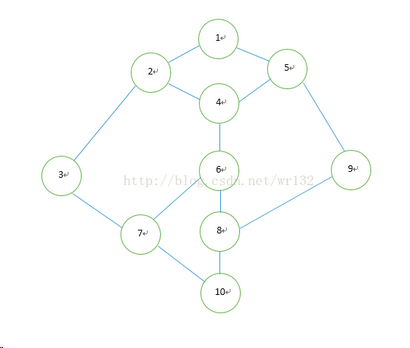
由图可以看出，BFS的搜索顺序为1->2->5->3->4->9->7->6->8->10，有点类似于树的层遍历，那么，规则知道了，接下来就是如何变成代码了，当然，我们是通过队列来实现的，这里涉及到队列的两种操作push（）向队尾压入一个元素，empty（），检测队列是否为空，front（）获得队首的元素，pop（）删除队首元素。  
算法描述如下：

（1）将起始节点放入队列尾部

（2）While(队列不为空）

    取得并删除队列首节点Node

    处理该节点Node

    把Node的未处理相邻节点加入队列尾部



这个就是图论算法中的单源最短路，求单源最短路比较通用的算法是 BFS 和 Dijkstra 算法，其区别是 BFS 不能用于带权重的图中, 而后者可以，可以看出在本题中两个字符串之间是无权重的, 也就是如果连通就是1, 不联通就是无穷。BFS 和 Dijkstra 的区别是前者的时间复杂度是 O(n), 后者最多优化到 O(mlogn)，所以如果条件成立一般选择 BFS 要更好。


## 127-Word Ladder  
以题目给出的例子为例，其实就是在所有路径的权重都为1的情况下求出下列无向图中从节点 hit 到节点 cog 的最短路径：
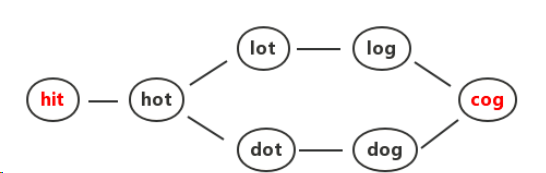、
Postscript：图中相互之间只相差一个字母的单词都是相邻节点。

回顾下二叉树的BFS  
1.把层次用BFS，不断加入，先进新出


In [ ]:


beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]

def ladderLength(beginWord, endWord, wordList):
        """
        :type beginWord: str
        :type endWord: str
        :type wordList: List[str]
        :rtype: int
        """
        wordList = set(wordList)
        visited = set()
        visited.add(beginWord)

        if endWord not in wordList:
            return 0

        dist = 1

        queue = [beginWord] #准备一个队列，先进先出
        gg=[]
        while queue:
            length = len(queue)
            for i in range(length): #在这个length就是属于同一层，
                #在一层就要决定一个方向，上图中的【lot,dot】，【log，dog】
                w = queue.pop(0) #pop 出最开始的
                print('pop0 '+w )
                if w == endWord: 
                    return dist #经历的个数
                for i in range(len(w)): #对某个单词的所有可能位置替换
                    chars = list(w)

                    for j in range(ord('a'), ord('z') + 1):#从a到z的进行替换
                        chars[i] = chr(j)
                        tmp = ''.join(chars)
                        if tmp in wordList:
                            wordList.remove(tmp) #如果发现在wordlist把 wordlist删了，表示已经访问过了
                            
                            print(wordList)
                            queue.append(tmp) #意味着下一步我们需要处理这个，
                            print(queue)
            dist += 1
        return 0
print(ladderLength(beginWord, endWord, wordList))